In [1]:
# basic
import sys
import os

# common
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import pickle
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#lib
from lib.forecast_methodology import *
from lib.forecast_plots import *
from lib.calibration import ds_timeline
from lib.extract_tcs import tcs_count_season, counting_ds

In [2]:
path_p = r'/home/administrador/Documentos/seasonal/seasonal_forecast/new/'
path_f = r'/media/administrador/SAMSUNG/seasonal_forecast/data/CFS/forecast_past_data/'

In [3]:
df = pd.read_pickle(path_p+'df_coordinates_pmin_sst_mld_2019.pkl')
xs = xr.open_dataset(path_p+'xs_index_vars_19822019_2deg_new.nc')
xds_kma = xr.open_dataset(path_p+'kma_model/xds_kma_index_vars_1b.nc')
xs_dwt_counts = xr.open_dataset(path_p+'kma_model/xds_count_tcs3.nc')
xs_dwt_counts_964 = xr.open_dataset(path_p+'kma_model/xds_count_tcs3_964.nc')
xds_timeM = xr.open_dataset(path_p+'xds_timeM3.nc')
xds_PCA = xr.open_dataset(path_p+'xds_PCA.nc')

<br>
<br>
<br>

#  <font color='navy'>**7. Seasonal Forecast** </font> 

>7.1 [Forecast data validation](#d)<br> <br>
>7.2 [Forecast application](#fapp)<br> <br>
>7.3 [Forecast outlook from different agencies](#look)<br> <br><br> <br>

<br />
<br />

## <font color='royalblue'>**7.1 Forecast data validation**</font> <a name="d"></a>

<br />

**After building and validating the model it will be applied to forecast TCs seasons from previous years to validate this data.**
<br>

**The forecasts from the first day of August, September, October and November. There are four runs per day of the model (00:00,06:00,12:00,18:00 hours).**

<br> 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: rgb(0,0,0); background-color: #fcf8e3; border-color: #faebcc; ">
    
**Steps:**
<br>  
    
 * **1.** Download <a href="https://www.ncei.noaa.gov/data/climate-forecast-system/access/operational-9-month-forecast/time-series/" target="_blank">from CFS 9-month operational forecast</a> and preprocess (file conversion and resolution interpolation) SST and MLD data.
 * **2.** Generation of the index predictor based on the index function obtained at the calibration period.
 * **3.** The fitted Principal Component Analysis for the calibration is used to predict the index principal components in that same temporal-spatial space.
 * **4.** The predicted PCs are assigned to the best match unit group from the fitted K-means clustering -> based on the index predictor a DWT is assigned to each day.
 * **5.** From the DWT the expected mean number of TCs in 8x8º cells map in the target area is known and the monthly aggregated maps are generated.
    
<br>    
 
</div>

In [ ]:
 #your path to the datasets containing the MLD and SST data of the season
path = path_f+'season_18_19/'

#year when the season starts
y = 2018

process_season_with_file(path,path_p,y,xds_PCA,xs_dwt_counts,xs_dwt_counts_964)

Forecast month 8
Hour 0
Unique DWTs(array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 13, 16, 22, 24, 29, 33, 34,
       39, 45, 48, 49]), array([ 3, 34, 15,  5,  9, 11,  5,  2,  8,  2, 65,  3, 18,  2, 14, 10, 15,
        3,  2, 17, 62]))


In [9]:
seasons = [11,12,13,14,15,16,17,18]
list_fs, list_fs_c3,list_mfs,list_mfs_c3, list_stdfs, list_stdfs_c3 = variables_plot_season_means(path_f, seasons,5,8)

11
12
13
14
15
16
17
18


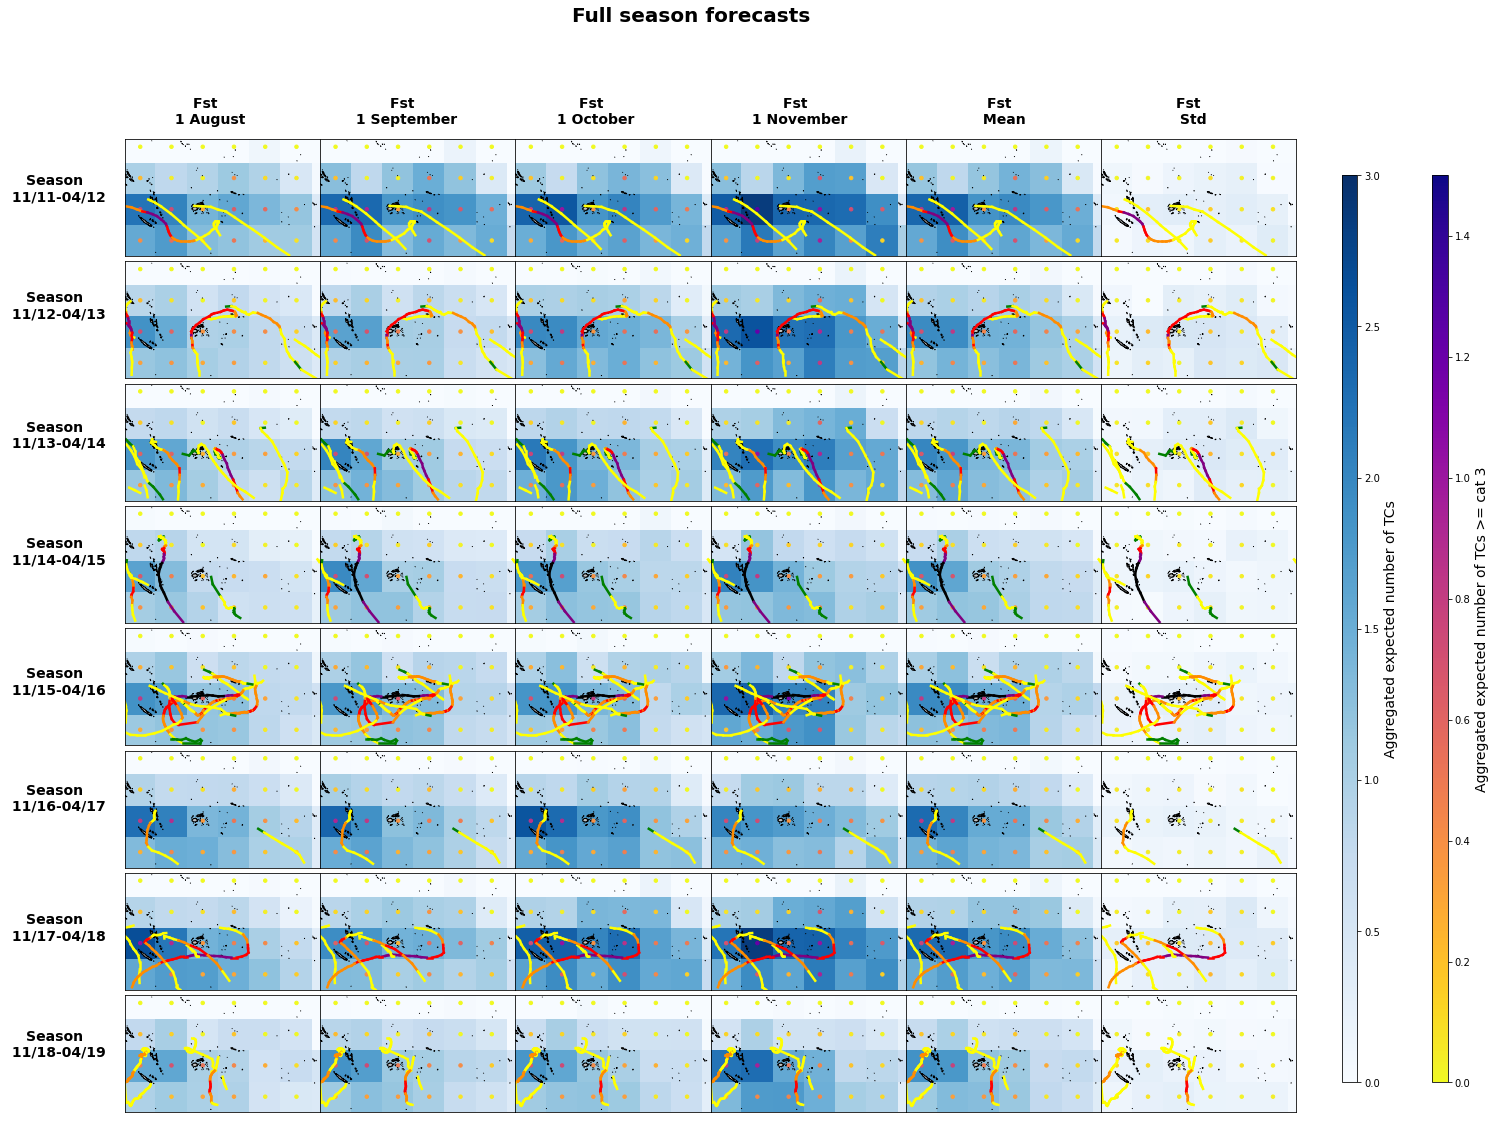

In [13]:
fig8_full_seasons = plot_season_means(ds4,3,1.5,list_fs, list_fs_c3,list_mfs,list_mfs_c3, list_stdfs, list_stdfs_c3,xds_timeM,12)

In [5]:
xds_timeline = ds_timeline(df,xs_dwt_counts,xs_dwt_counts_964,xds_kma)

**FORECAST vs MODEL DWTs probabilities**

In [7]:
#bmus from the calibration period of the methodology, from 01/1982 to 12/2019
ds_bmus = xr.Dataset({
    'bmus': (('time'), xds_kma.bmus.values),

},{
    'time': xds_kma.time.values,

})

print(ds_bmus)

<xarray.Dataset>
Dimensions:  (time: 13879)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    bmus     (time) int64 26 26 23 23 23 23 10 26 26 ... 24 24 24 24 24 24 24 24


In [8]:
s11,m11,std11,s12,m12,std12,s13,m13,std13,s14,m14,std14,s15,m15,std15,s16,m16,std16,s17,m17,std17,s18,m18,std18,s19,m19,std19,list_metm,list_smet = variables_dwt_forecast_plot(ds_bmus,2011,path_f+'season_')

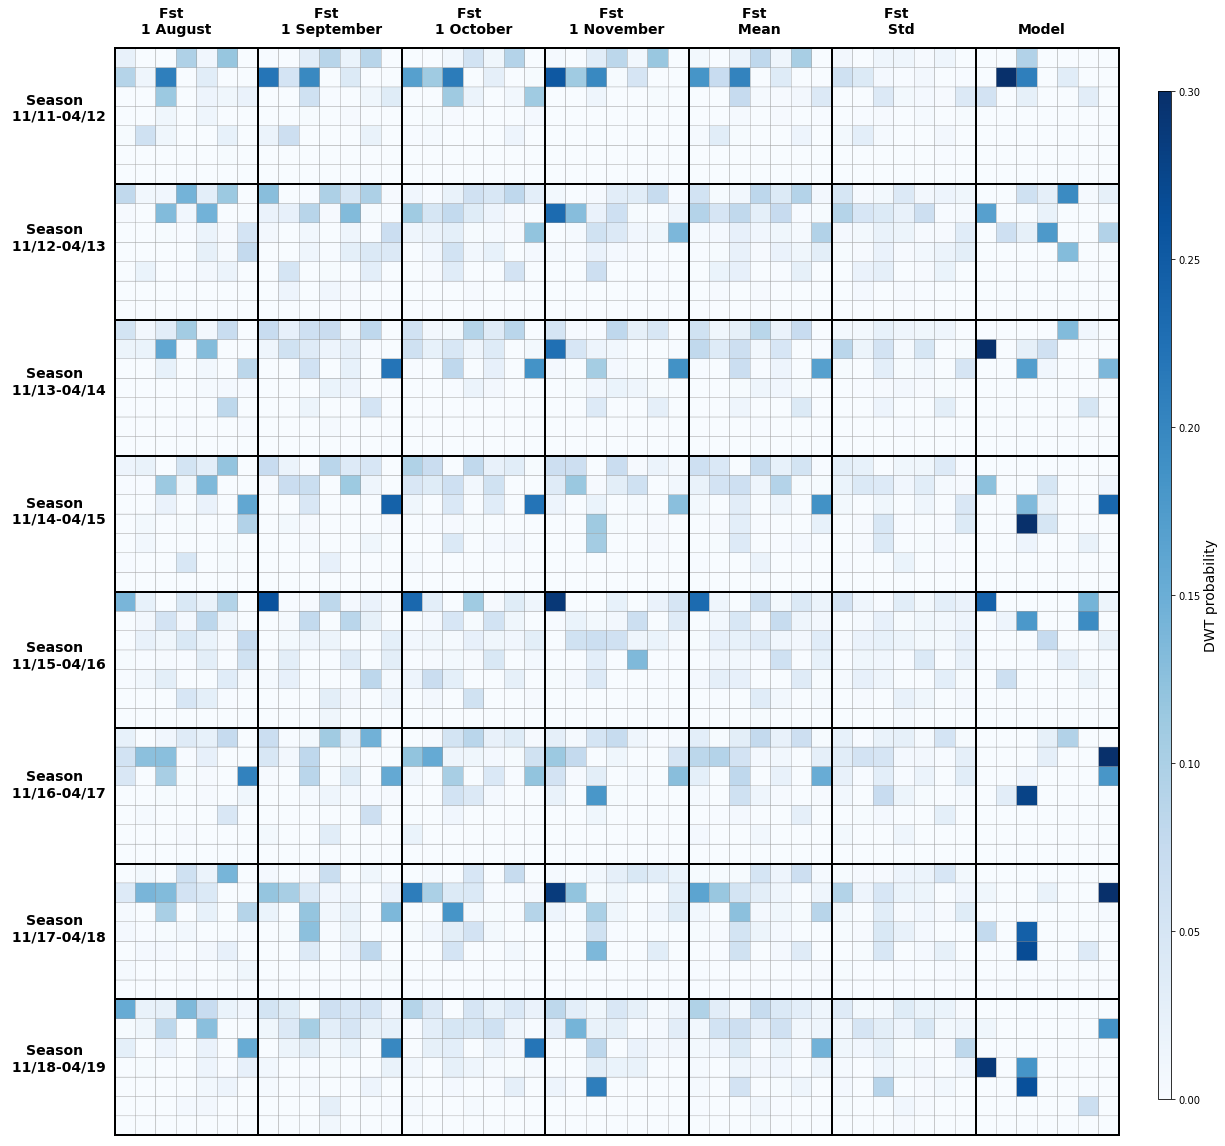

In [9]:
fig_dwt = dwt_forecast_plot(0.3,s11,m11,std11,s12,m12,std12,s13,m13,std13,s14,m14,std14,s15,m15,std15,s16,m16,std16,s17,m17,std17,s18,m18,std18,s19,m19,std19,list_metm,list_smet)

<br> 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: rgb(0,0,0); background-color: #fcf8e3; border-color: #faebcc; ">

**Recall**:
<br>
    
* The model generally performs well when estimating the expected TC activity and intensity.   
* However rather than reproducing exactly the historical TCs tracks it shows higher number of expected TCs in the TC path and also in the surroundings (overstimation)
* In puntctual cases where the number of historical TC tracks in a cell is greater than 3 there is an understimation.
* When a TC is very intense or very close in dates to the previous or following month it leaves its footprint.
<br>
<br>
    
**Forecast data**:
* Much greater uncertainty -> DWTs probability is greatly shared and therefore more extended predictand maps.
* The weakness of the model are enhanced.
<br>
    
**Although the model has been proven to perform very well, the accuracy and reliability of the forecast greatly depends of the quality of the forecast data, which has also been proven to be quite improvable.**
    
    
</div>

<br />

## <font color='royalblue'>**7.3 Forecast application**</font> <a name="fapp"></a>

<br />

In [6]:
#your path to the datasets containing the MLD and SST data
path = r'/media/administrador/SAMSUNG/seasonal_forecast/data/CFS/forecast_01_04_2021/'

#year and month of the forecast day
y = 2021
m = 4

In [7]:
process_day_with_file(path,path_p,y,m,xds_PCA,xs_dwt_counts,xs_dwt_counts_964)

Forecast month 4
Hour 0
Unique DWTs(array([ 1,  4,  5,  7, 11, 13, 16, 20, 22, 29, 33, 34, 35, 40, 41, 45, 46,
       47, 48, 49]), array([ 4, 16, 13, 21, 10, 19, 13,  8, 24, 25,  1, 19,  3, 11, 37,  8, 67,
        3,  4,  1]))
xds_timeline_M4_f1.nc
xs_M4_f1.nc
Hour 6
Unique DWTs(array([ 1,  4,  5,  7, 11, 13, 16, 29, 33, 34, 39, 41, 43, 44, 48, 49]), array([ 6, 20, 12, 13, 21, 53, 17,  1, 12, 34, 10,  5,  6,  1, 76, 20]))
xds_timeline_M4_f2.nc
xs_M4_f2.nc
Hour 12
Unique DWTs(array([ 1,  4,  5,  6, 11, 13, 16, 20, 22, 29, 34, 38, 39, 40, 41, 46, 47,
       48, 49]), array([ 3, 13, 19,  1, 14, 33, 15,  4,  6, 36, 19, 11,  7,  2, 16,  9,  2,
       96,  1]))
xds_timeline_M4_f3.nc
xs_M4_f3.nc
Hour 18
Unique DWTs(array([ 1,  4,  5,  7, 10, 11, 13, 16, 18, 20, 22, 25, 29, 32, 33, 34, 38,
       39, 41, 46, 48]), array([ 3, 24,  9,  4,  1,  2, 17, 10, 15,  7, 13,  1,  5, 19, 12, 40, 10,
        1, 15,  6, 92]))
xds_timeline_M4_f4.nc
xs_M4_f4.nc


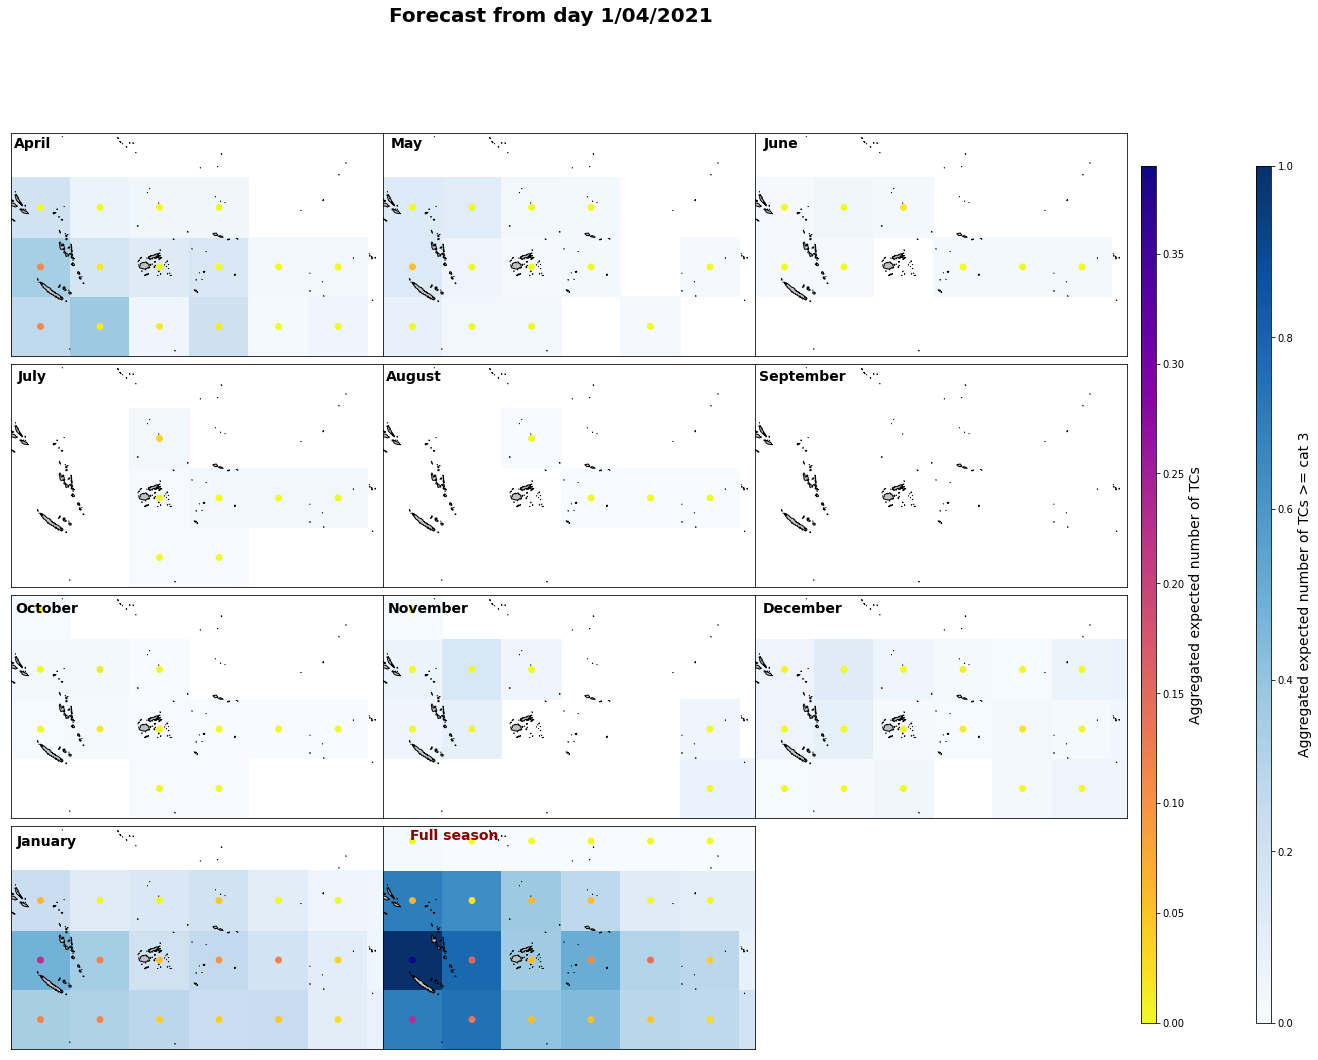

In [14]:
mean_day, mean_day_c3, mean_day_full_season,mean_day_full_season_c3,ds = variables_plot_forecast(path,2021,4,5,8)
fig8_f = plot_forecast(ds,1,0.39,mean_day, mean_day_c3, mean_day_full_season,mean_day_full_season_c3,35)